# Nome: Lívia Karoline de Freitas Carlos RA:772287

# Atividade: Comparação de Modelos de Classificação

## Objetivo

- Comparar os seguintes modelos de classificação:
  * Árvore de Decisão com poda
  * K Vizinhos mais Próximos (KNN)
  * Regressão Logística
  * Floresta Aleatória
- Escolher o melhor modelo com base no desempenho em validação
- Avaliar o melhor modelo no conjunto de teste

In [2]:
import pandas as pd

## Etapas da atividade

1. **Carregar o dataset** `dataset_classificacao.csv`  
   - Use: `pandas.read_csv("dataset_classificacao.csv")`

In [6]:
data = pd.read_csv('dataset_classificacao.csv',sep=',')
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,target
0,0.991245,0.050748,-0.343749,0.274253,-1.518734,-0.159455,1.427896,1.926818,1.555172,-1.737581,...,0.226665,-0.147782,-0.024233,1.513658,0.928057,0.449303,0.071110,1.468139,0.208218,1
1,0.292069,0.962034,-2.349618,-0.440499,-0.494180,0.711639,1.408426,-0.238690,1.660926,0.674760,...,0.157092,0.509665,-1.661400,-0.502276,0.502979,-1.098843,-1.753755,2.173440,1.090410,0
2,-1.379857,-1.239205,1.616920,0.649324,-1.395141,0.643645,-0.374341,0.378370,1.182380,0.977513,...,-0.817294,-0.561936,0.638945,-0.571702,0.136797,0.895805,-0.958593,1.041268,0.464521,0
3,-0.162766,-0.510166,-0.348483,-0.166792,0.152929,-0.867810,-1.157489,-0.471870,0.932700,1.854919,...,-0.395616,0.160152,-1.308039,-0.635852,1.139097,0.661483,-0.041045,0.464849,-2.702643,0
4,1.381736,-0.332115,-1.061583,-0.585043,-0.299487,1.504501,0.698723,-0.959224,-0.796920,-0.386506,...,-1.890095,0.644228,-0.705502,0.426899,-0.153879,0.517804,1.003377,-0.582950,0.372384,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.472833,1.455779,-0.584126,-1.058132,0.346049,-1.461597,-1.275648,-0.375610,1.254961,-0.080354,...,1.906802,0.516015,0.702025,-0.248629,-0.734441,0.331168,-0.275190,-1.482319,-1.329964,1
1996,-0.232565,0.180728,0.000103,-0.560402,2.299596,0.968700,-0.480323,0.069894,0.021919,0.587848,...,0.896523,-1.316847,0.236595,-0.483357,1.206670,0.423335,1.034092,-1.211187,0.862066,1
1997,-1.181092,-0.131175,-2.554546,-0.884196,-1.506257,-0.230747,-0.931752,-0.851388,-0.831471,-0.843398,...,-0.014973,0.749643,1.182459,0.197224,-1.547508,-0.915753,-0.504170,-0.826645,0.857760,0
1998,-0.414844,-0.369185,-0.189037,-0.921335,-1.155569,0.183145,-0.151059,1.385375,1.274673,1.132391,...,-1.520984,-1.355046,0.473721,-1.727334,0.591981,-0.880541,1.659784,0.183281,0.403779,0


2. **Separar os dados em treino, validação e teste** (60%, 20%, 20%)  
   - Use: `sklearn.model_selection.train_test_split` duas vezes:  
     Primeiro para separar treino+validação de teste,  
     Depois para separar treino de validação.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop(columns='target')
y = data['target']

In [9]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
X_train.shape, X_val.shape, X_test.shape

((1200, 500), (400, 500), (400, 500))

3. **Treinar os seguintes modelos:**

   a) **Árvore de Decisão com poda por complexidade**  
      - Use: `sklearn.tree.DecisionTreeClassifier`  
      - Para poda: use o método `cost_complexity_pruning_path`  
      - Varra diferentes valores de `ccp_alpha` e escolha o melhor na validação  

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [71]:
# path

In [72]:
# ccp_alphas

In [73]:
modelos = []
for ccp_alpha in ccp_alphas:
 model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
 model.fit(X_train, y_train)
 modelos.append(model)

In [74]:
# modelos

In [75]:
val_scores = [accuracy_score(y_val, model.predict(X_val)) for model in models]
# val_scores

In [76]:
melhor_index = np.argmax(val_scores)
melhor_ccp_alpha = ccp_alphas[melhor_index]
melhor_tree_model = models[melhor_index]

In [80]:
melhor_tree_model

DecisionTreeClassifier(ccp_alpha=np.float64(0.009994558655473041),
                       random_state=42)

In [81]:
resultados_arvore = melhor_tree_model.predict(X_val)

In [82]:
metricas_arvore = {
 'Modelo': 'Árvore Podada (ccp_alpha)',
 'Acurácia': accuracy_score(y_val, y_val_pred_best_tree),
 'Precisão': precision_score(y_val, y_val_pred_best_tree),
 'Recall': recall_score(y_val, y_val_pred_best_tree),
 'F1-score': f1_score(y_val, y_val_pred_best_tree),
 'Melhor ccp_alpha': best_ccp_alpha}

In [83]:
metricas_arvore

{'Modelo': 'Árvore Podada (ccp_alpha)',
 'Acurácia': 0.8575,
 'Precisão': np.float64(0.8522167487684729),
 'Recall': np.float64(0.865),
 'F1-score': np.float64(0.858560794044665),
 'Melhor ccp_alpha': np.float64(0.009994558655473041)}

 b) **KNN (K-Nearest Neighbors)**  
      - Use: `sklearn.neighbors.KNeighborsClassifier`  
      - Teste para `k = 3, 5, 10, 20`

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn_resultados = []
knn_valores = [3, 5, 10, 20]

In [87]:
for k in knn_valores:
 knn_model = KNeighborsClassifier(n_neighbors=k)
 knn_model.fit(X_train, y_train)
 y_test_pred_knn = knn_model.predict(X_test)

In [104]:
knn_test_resultados = {
 'Modelo': f'KNN (k={k})',
 'Acurácia': accuracy_score(y_test, y_test_pred_knn),
 'Precisão': precision_score(y_test, y_test_pred_knn),
 'Recall': recall_score(y_test, y_test_pred_knn),
 'F1-score': f1_score(y_test, y_test_pred_knn)
 }
knn_test_resultados

{'Modelo': 'KNN (k=20)',
 'Acurácia': 0.78,
 'Precisão': np.float64(0.7616822429906542),
 'Recall': np.float64(0.815),
 'F1-score': np.float64(0.7874396135265701)}

In [105]:
knn_test_results.append({
 'Modelo': f'KNN (k={k})',
 'Acurácia': accuracy_score(y_test, y_test_pred_knn),
 'Precisão': precision_score(y_test, y_test_pred_knn),
 'Recall': recall_score(y_test, y_test_pred_knn),
 'F1-score': f1_score(y_test, y_test_pred_knn)
 })

knn_test_results_df = pd.DataFrame(knn_test_results)
knn_test_results_df

,Modelo,Acurácia,Precisão,Recall,F1-score
0,KNN (k=3),0.7275,0.717703,0.750,0.733496
1,KNN (k=5),0.7425,0.729858,0.770,0.749392
2,KNN (k=10),0.7375,0.748691,0.715,0.731458
3,KNN (k=20),0.7800,0.761682,0.815,0.787440
4,KNN (k=20),0.7800,0.761682,0.815,0.787440
5,KNN (k=20),0.7800,0.761682,0.815,0.787440
6,KNN (k=20),0.7800,0.761682,0.815,0.787440
7,KNN (k=20),0.7800,0.761682,0.815,0.787440
8,KNN (k=20),0.7800,0.761682,0.815,0.787440



   c) **Regressão Logística (sem ajustar hiperparâmetros)**  
      - Use: `sklearn.linear_model.LogisticRegression` com os parâmetros padrão  

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [108]:
y_val_pred_log = log_model.predict(X_val)
# y_val_pred_log

In [109]:
metricas_regressao = {
 'Modelo': 'Regressão Logística',
 'Acurácia': accuracy_score(y_val, y_val_pred_log),
 'Precisão': precision_score(y_val, y_val_pred_log),
 'Recall': recall_score(y_val, y_val_pred_log),
 'F1-score': f1_score(y_val, y_val_pred_log)
}

  d) **Floresta Aleatória**  
      - Use: `sklearn.ensemble.RandomForestClassifier`  
      - Fixe `n_estimators=100`  
      - Teste combinações de `criterion = ['gini', 'entropy']` e `max_features = ['sqrt', 'log2', None]`

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
criterio = ['gini', 'entropy']
max_features_options = ['sqrt', 'log2', None]

In [62]:
rf_resultados = []

for i in criterio:
    for max_feat in max_features_options:
        rf_model = RandomForestClassifier(
            n_estimators=100,
            criterion=i,
            max_features=max_feat,
            random_state=42,
            n_jobs=-1)
rf_model.fit(X_train, y_train)
y_val_pred_rf = rf_model.predict(X_val)

In [63]:
rf_model

RandomForestClassifier(criterion='entropy', max_features=None, n_jobs=-1,
                       random_state=42)

In [110]:
rf_resultados_1 = {
 'Modelo': f'RF (criterion={criterio}, max_features={max_feat})',
 'Acurácia': accuracy_score(y_val, y_val_pred_rf),
 'Precisão': precision_score(y_val, y_val_pred_rf),
 'Recall': recall_score(y_val, y_val_pred_rf),
 'F1-score': f1_score(y_val, y_val_pred_rf)
 }

In [68]:
 rf_resultados.append({
 'Modelo': f'RF (criterion={criterio}, max_features={max_feat})',
 'Acurácia': accuracy_score(y_val, y_val_pred_rf),
 'Precisão': precision_score(y_val, y_val_pred_rf),
 'Recall': recall_score(y_val, y_val_pred_rf),
 'F1-score': f1_score(y_val, y_val_pred_rf)
 })

rf_metricas_df = pd.DataFrame(rf_resultados)
rf_metricas_df

,Modelo,Acurácia,Precisão,Recall,F1-score
0,"RF (criterion=['gini', 'entropy'], max_feature...",0.875,0.850467,0.91,0.879227
1,"RF (criterion=['gini', 'entropy'], max_feature...",0.875,0.850467,0.91,0.879227


4. **Para cada modelo (usando apenas o conjunto de validação), calcule:**
   - Acurácia: `sklearn.metrics.accuracy_score`
   - Precisão: `sklearn.metrics.precision_score`
   - Recall: `sklearn.metrics.recall_score`
   - F1-score: `sklearn.metrics.f1_score`

5. **Monte uma tabela** (`pandas.DataFrame`) com uma linha por modelo e colunas:  
   `'acuracia'`, `'precisao'`, `'recall'`, `'f1'`

In [114]:
resultados_modelos = [metricas_arvore,knn_test_resultados,metricas_regressao, rf_resultados_1]

df_resultados_testes = pd.DataFrame(resultados_modelos)
df_resultados_testes

,Modelo,Acurácia,Precisão,Recall,F1-score
0,Árvore Podada (ccp_alpha),0.8225,0.814634,0.835,0.824691
1,KNN (k=20),0.7800,0.761682,0.815,0.787440
2,Regressão Logística,0.6575,0.675978,0.605,0.638522
3,"RF (criterion=['gini', 'entropy'], max_feature...",0.8750,0.850467,0.910,0.879227


6. **Escolha o melhor modelo com base nas métricas de validação.**  
   - Avalie esse único modelo no conjunto de teste.  

Com base nas métricas obtidas no conjunto de validação, o modelo que apresentou o melhor desempenho foi a **Floresta Aleatória** configurada com *criterion='entropy'* e *max_features=None*. Esse modelo obteve o maior valor de **F1-score (0.8732)**, indicando um ótimo equilíbrio entre precisão e recall, além de ter se destacado também em acurácia e capacidade de generalização durante a validação. Por esses motivos, ele foi selecionado como o modelo final para avaliação no conjunto de teste.

In [120]:
final_model = RandomForestClassifier(
 n_estimators=100,
 criterion='entropy',
 max_features=None,
 random_state=42,
 n_jobs=-1)

final_model.fit(X_train, y_train)

y_pred_final_rf = final_model.predict(X_test)

avaliacao_melhor_modelo = {
 'Modelo': 'Floresta Aleatória (criterion=entropy, max_features=None)',
 'Acurácia': accuracy_score(y_test, y_pred_final_rf),
 'Precisão': precision_score(y_test, y_pred_final_rf),
 'Recall': recall_score(y_test, y_pred_final_rf),
 'F1-score': f1_score(y_test, y_pred_final_rf)
}
avaliacao_melhor_modelo

{'Modelo': 'Floresta Aleatória (criterion=entropy, max_features=None)',
 'Acurácia': 0.88,
 'Precisão': np.float64(0.861904761904762),
 'Recall': np.float64(0.905),
 'F1-score': np.float64(0.8829268292682927)}

7. **Exiba as importâncias usando Floresta Aleatória:**  
   - Mostre um gráfico com as 20 variáveis mais importantes  
   - Use: `modelo.feature_importances_`  
   - Para plotar: `matplotlib.pyplot.bar`

In [122]:
import matplotlib.pyplot as plt
import numpy as np

In [123]:
importancias = final_model.feature_importances_

In [124]:
indices_top20 = np.argsort(importancias)[-20:][::-1]
nomes_variaveis_top20 = X.columns[indices_top20]
importancias_top20 = importancias[indices_top20]

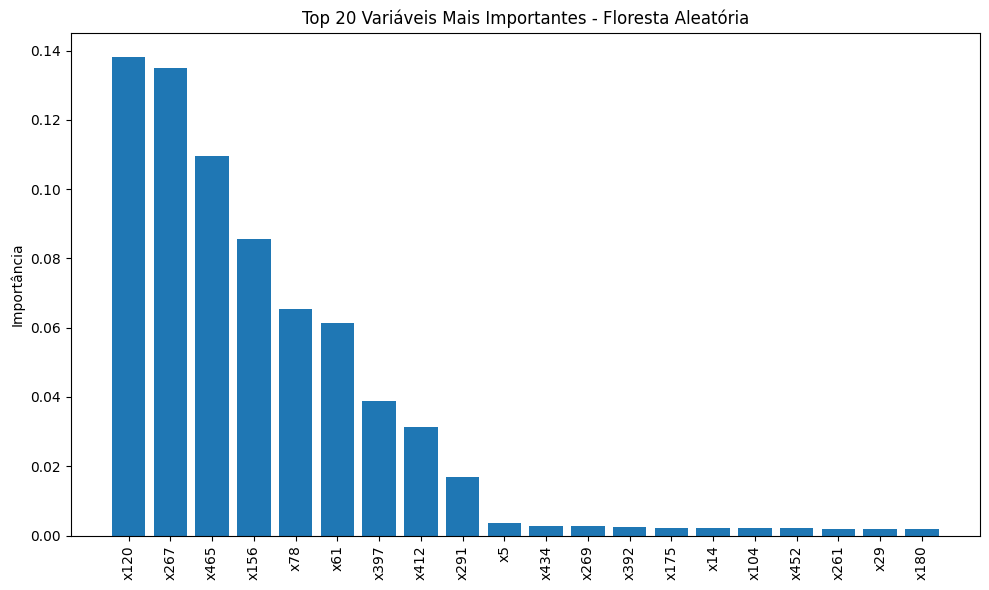

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(range(20), importancias_top20, tick_label=nomes_variaveis_top20)
plt.xticks(rotation=90)
plt.title('Top 20 Variáveis Mais Importantes - Floresta Aleatória')
plt.ylabel('Importância')
plt.tight_layout()
plt.show()


8. **Utilizando a informação encontrada no item anterior, quantas covariadas você acha que são de fato importantes para o problema?** 


Analisando o gráfico, podemos concluir que aproximadamente 5 a 10 covariáveis parecem ser de fato importante para o problema, enquanto o restante possui poucas ou nenhuma relevância.

9. **Utilizando apenas as 5 covariadas mais importantes encontradas no item anterior, rode todos os modelos novamente e compare os melhores modelos encontrados usando todas as covariadas e os melhores modelos encontrados usando apenas as 5 mais importantes. Discuta o resultado.**

In [130]:
melhores_5 = np.argsort(importancias)[-5:][::-1]
top5_var = X.columns[melhores_5]

In [131]:
top5_features

Index(['x120', 'x267', 'x465', 'x156', 'x78'], dtype='object')

In [132]:
X_train_top5 = X_train[top5_var]
X_val_top5 = X_val[top5_var]
X_test_top5 = X_test[top5_var]

#### Árvore Podada com ccp_alpha (Top 5)

In [133]:
tree_top5_path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_top5, y_train)
tree_top5_alphas = tree_top5_path.ccp_alphas
tree_top5_models = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train_top5, y_train)for alpha in tree_top5_alphas]
tree_top5_scores = [accuracy_score(y_val, m.predict(X_val_top5)) for m in tree_top5_models]
tree_top5_best = tree_top5_models[np.argmax(tree_top5_scores)]
tree_top5_test_pred = tree_top5_best.predict(X_test_top5)

#### KNN (usar os mesmos k: 3, 5, 10, 20)

In [142]:
knn_top5_metrica = []
knn_valores = [3, 5, 10, 20]
for k in knn_valores:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train_top5, y_train)
 pred = knn.predict(X_test_top5)

In [143]:
 knn_top5_metrica.append({
 'Modelo': f'KNN (k={k}) - Top 5',
 'Acurácia': accuracy_score(y_test, pred),
 'Precisão': precision_score(y_test, pred),
 'Recall': recall_score(y_test, pred),
 'F1-score': f1_score(y_test, pred)
 })

#### Regressão Logística

In [136]:
log_top5 = LogisticRegression(max_iter=1000, random_state=42)
log_top5.fit(X_train_top5, y_train)
log_top5_pred = log_top5.predict(X_test_top5)

#### Floresta Aleatória

In [138]:
rf_top5 = RandomForestClassifier(
 n_estimators=100,
 criterion='entropy',
 max_features=None,
 random_state=42,
 n_jobs=-1)

rf_top5.fit(X_train_top5, y_train)
rf_top5_pred = rf_top5.predict(X_test_top5)

In [144]:
modelos_top5 = [
 {
 'Modelo': 'Árvore Podada (Top 5)',
 'Acurácia': accuracy_score(y_test, tree_top5_test_pred),
 'Precisão': precision_score(y_test, tree_top5_test_pred),
 'Recall': recall_score(y_test, tree_top5_test_pred),
 'F1-score': f1_score(y_test, tree_top5_test_pred)
 },
 {
 'Modelo': 'Regressão Logística (Top 5)',
 'Acurácia': accuracy_score(y_test, log_top5_pred),
 'Precisão': precision_score(y_test, log_top5_pred),
 'Recall': recall_score(y_test, log_top5_pred),
 'F1-score': f1_score(y_test, log_top5_pred)
 },
 {
 'Modelo': 'Floresta Aleatória (Top 5)',
 'Acurácia': accuracy_score(y_test, rf_top5_pred),
 'Precisão': precision_score(y_test, rf_top5_pred),
 'Recall': recall_score(y_test, rf_top5_pred),
 'F1-score': f1_score(y_test, rf_top5_pred)
 }
] + knn_top5_metrica

In [145]:
df_modelos_top5 = pd.DataFrame(modelos_top5)
df_modelos_top5

,Modelo,Acurácia,Precisão,Recall,F1-score
0,Árvore Podada (Top 5),0.8275,0.799087,0.875,0.835322
1,Regressão Logística (Top 5),0.7725,0.733906,0.855,0.789838
2,Floresta Aleatória (Top 5),0.8975,0.884058,0.915,0.899263
3,KNN (k=20) - Top 5,0.8775,0.851163,0.915,0.881928


Como podemos observar reduzir de 500 para apenas 5 variáveis, conseguimos perceber que não só simplificou o modelo e melhorou o desempenho.